In [2]:
import pandas as pd 
import numpy as np

import cognitive_GLVQ as cglvq
import GLVQ as glvq
import optimizer as opt

import random

In [3]:
class_labels = {
    "B": 0,
    "M": 1,
}

In [4]:
num_prototypes = 5

# Data prep

In [5]:
# Load the data
df = pd.read_csv("dataset/breast_cancer_wisconsin_dataset/data.csv")

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
feature = df[df.columns[2:32]]
label = df[df.columns[1]]

feature = feature.to_numpy()
label = label.to_numpy()
label = label.reshape(-1, 1)

In [7]:
unique, count = np.unique(label, return_counts=True)
dict(zip(unique, count))

{'B': 357, 'M': 212}

In [8]:
label = np.vectorize(class_labels.get)(label)

## Select prototypes

In [9]:
prototypes_index = []
for i in range(len(class_labels)):
    index_i = np.where(label == i)
    index_i = list(index_i[0])
    prototype_index_i = random.sample(index_i, num_prototypes)
    prototypes_index += prototype_index_i
prototypes_index.sort(reverse=True)

prototypes = [(feature[i],label[i]) for i in prototypes_index]

## Remove prototypes from dataset
feature = np.delete(feature, prototypes_index, axis=0)
label = np.delete(label, prototypes_index, axis=0)    

### Accuracy

In [10]:
# Select equal amount of normal and abnormal data
data_per_class = min(count) - num_prototypes

dataset_index = []
for i in range(len(class_labels)):
    index_i = np.where(label == i)
    index_i = list(index_i[0])
    index_i_sample = random.sample(index_i, data_per_class)
    dataset_index += index_i_sample

random.shuffle(dataset_index)
dataset_acc = [(feature[i],label[i]) for i in dataset_index]

In [11]:
# Taking 15% of the dataset for testing
len_dataset_acc = len(dataset_acc)
test_size = 0.15
test_set_acc = dataset_acc[:int(len_dataset_acc*test_size)]
train_set_acc = dataset_acc[int(len_dataset_acc*test_size):]

#### Train the Models

In [12]:
num_epochs = 100

##### GLVQ

In [13]:
learning_rate = 0.1
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc)

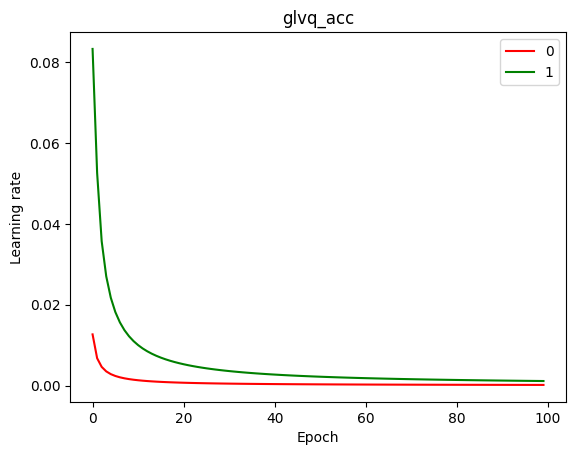

In [14]:
glvq_acc.lr_graph("glvq_acc")

In [15]:
learning_rate = 0.03
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc)

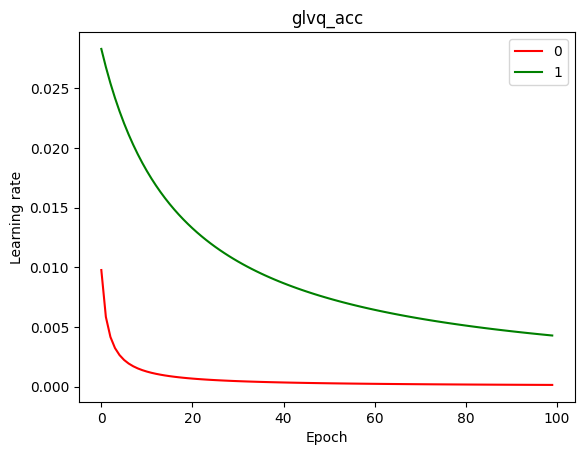

In [16]:
glvq_acc.lr_graph("glvq_acc")

In [17]:
learning_rate = 0.01
glvq_acc = glvq.GLVQ(prototypes,learning_rate)
hist = glvq_acc.train(num_epochs,train_set_acc,test_set_acc)

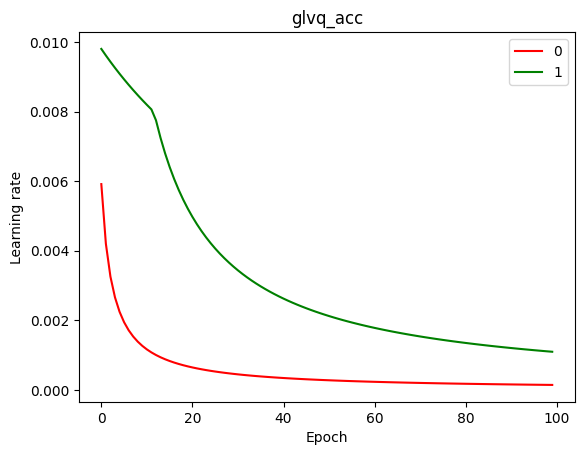

In [18]:
glvq_acc.lr_graph("glvq_acc")

In [19]:
learning_rate = 0.1
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability)

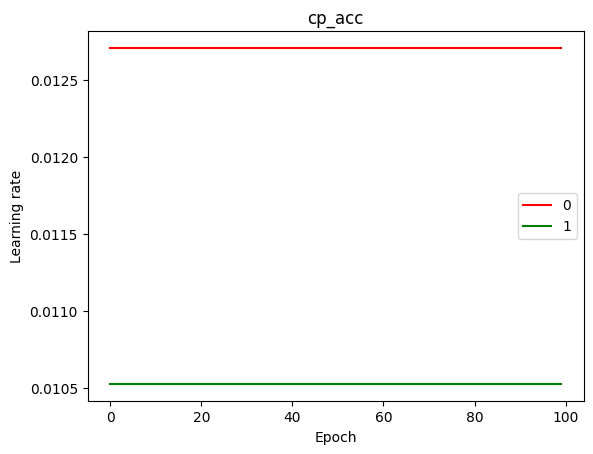

In [20]:
cp_glvq_acc.lr_graph("cp_acc")

In [21]:
learning_rate = 0.03
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability)

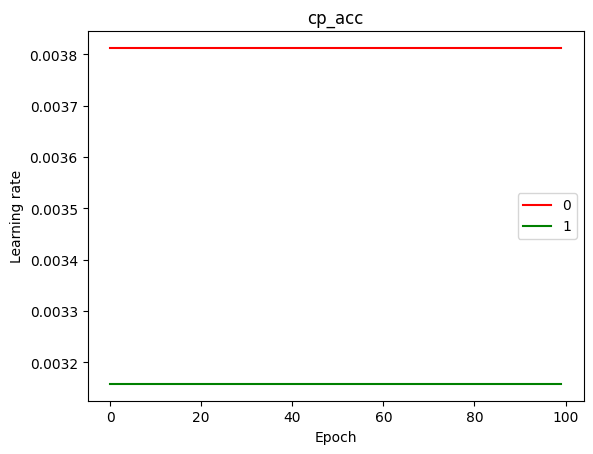

In [22]:
cp_glvq_acc.lr_graph("cp_acc")

In [23]:
learning_rate = 0.01
cp_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = cp_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.conditional_probability)

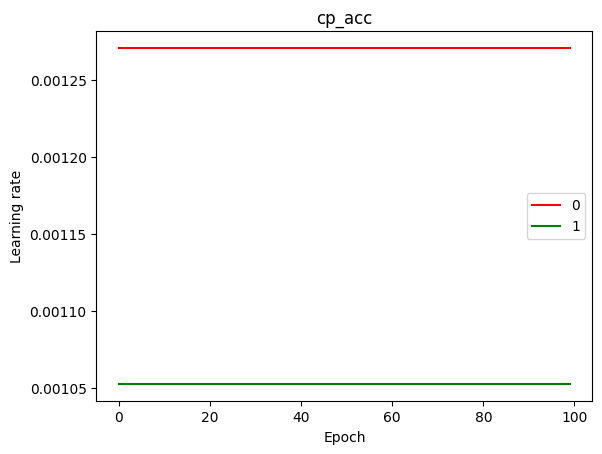

In [24]:
cp_glvq_acc.lr_graph("cp_acc")

##### LS

In [26]:
learning_rate = 0.1
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry)

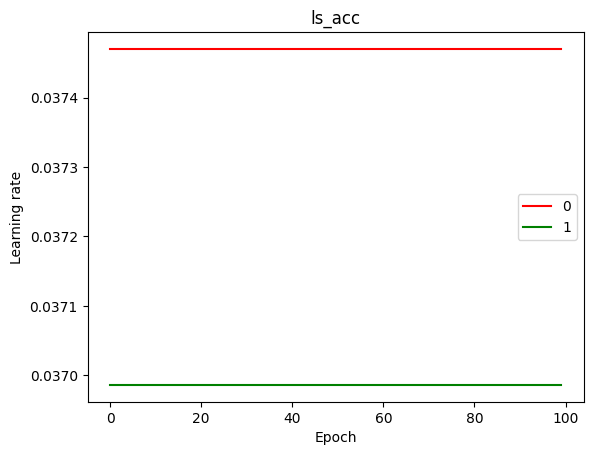

In [27]:
ls_glvq_acc.lr_graph("ls_acc")

In [28]:
learning_rate = 0.03
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry)

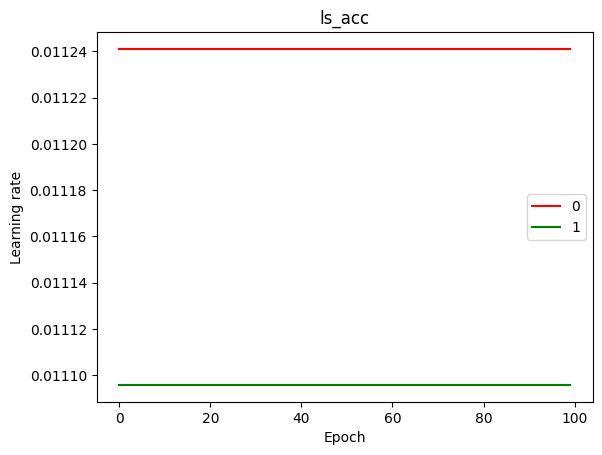

In [29]:
ls_glvq_acc.lr_graph("ls_acc")

In [30]:
learning_rate = 0.01
ls_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = ls_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry)

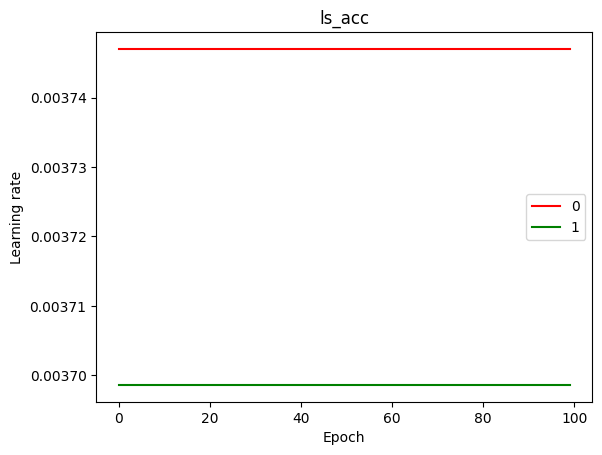

In [31]:
ls_glvq_acc.lr_graph("ls_acc")

##### LSR

In [32]:
learning_rate = 0.1
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity)

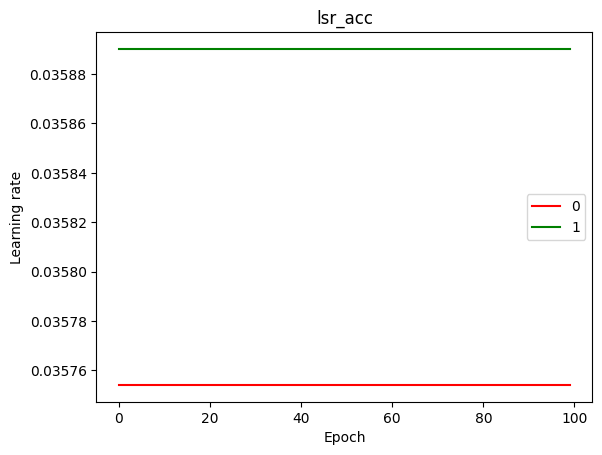

In [33]:
lsr_glvq_acc.lr_graph("lsr_acc")

In [34]:
learning_rate = 0.03
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity)

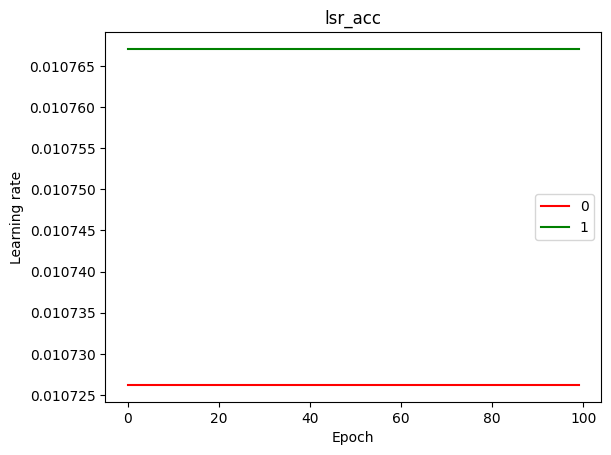

In [35]:
lsr_glvq_acc.lr_graph("lsr_acc")

In [36]:
learning_rate = 0.01
lsr_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = lsr_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.loose_symmetry_rarity)

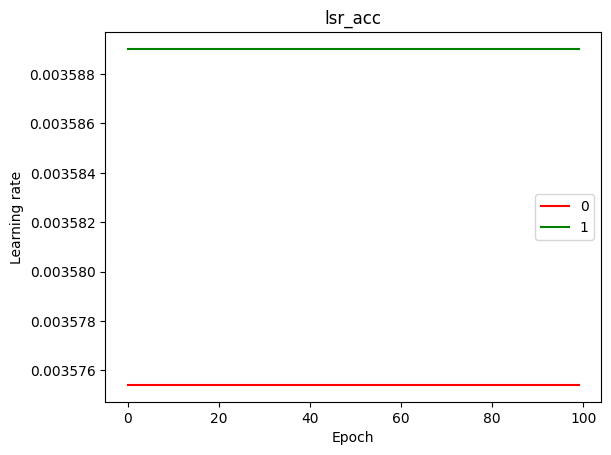

In [37]:
lsr_glvq_acc.lr_graph("lsr_acc")

##### DFH

In [38]:
learning_rate = 0.1
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic)

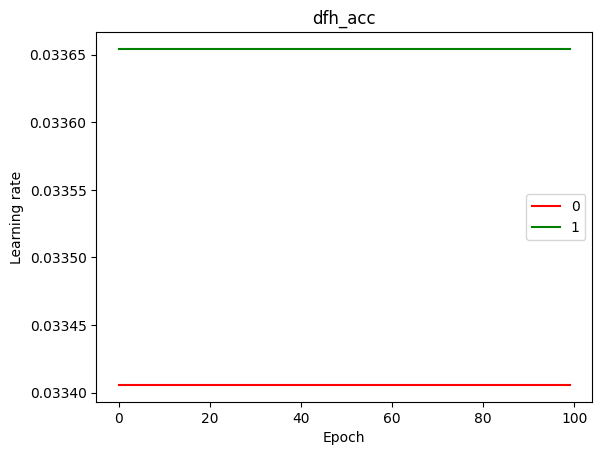

In [39]:
dfh_glvq_acc.lr_graph("dfh_acc")

In [40]:
learning_rate = 0.03
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic)

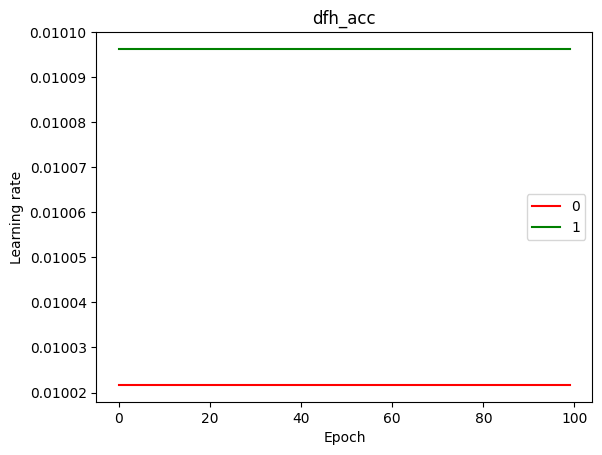

In [41]:
dfh_glvq_acc.lr_graph("dfh_acc")

In [42]:
learning_rate = 0.01
dfh_glvq_acc = cglvq.CGLVQ(prototypes,learning_rate)
hist = dfh_glvq_acc.train(num_epochs,train_set_acc, test_set_acc, opt.dual_factor_heuristic)

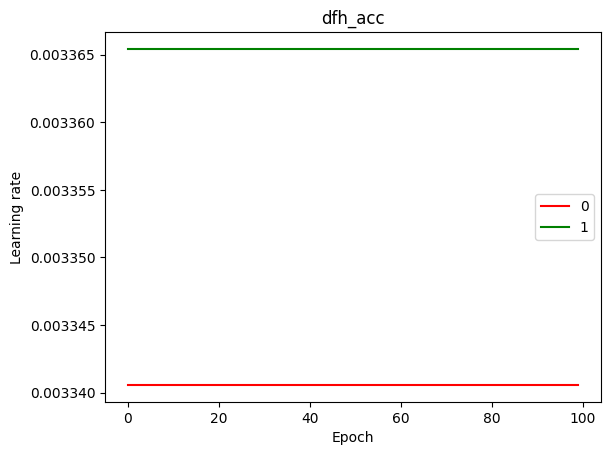

In [43]:
dfh_glvq_acc.lr_graph("dfh_acc")